In [1]:
import pandas as pd

In [93]:
daily_temp_df = pd.read_csv('daily_temperature.zip')

/Users/ricalanis/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [94]:
daily_temp_df.head(5)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [95]:
def add_zero(t):
    if int(t)<10:
        return '0'+str(t)
    return str(t)

In [96]:
daily_temp_df = daily_temp_df[daily_temp_df['Year'] > 2016].reset_index()

In [97]:
daily_temp_df['Date'] = daily_temp_df['Year'].astype(str) + '-' + daily_temp_df['Month'].apply(lambda x: add_zero(x))+'-' + daily_temp_df['Day'].apply(lambda x: add_zero(x))

In [98]:
daily_temp_df = daily_temp_df[['Country', 'Date', 'AvgTemperature']].dropna().drop_duplicates()

In [99]:
 daily_temp_df['Date'] = pd.to_datetime(daily_temp_df['Date'], format='%Y-%m-%d')

In [103]:
temprature_Srilanaka = daily_temp_df[ daily_temp_df['Country'] == 'Sri Lanka']

In [105]:
temprature_Srilanaka.reset_index().to_csv('temperature_srilanka.csv', index=None)

In [109]:
#import pandas
import pandas as pd
file = 'temperature_srilanka.csv'
df = pd.read_csv(file)
#filter dataframe
mask = (df['Date'] >= '2016-01-01') & (df['Date'] <= '2020-05-10')
df = df.loc[mask]
#set Date as index
df.set_index('Date', inplace=True)
df.head(10)
df.tail(10)

,index,Country,AvgTemperature
Date,,,
2020-05-01,64253,Sri Lanka,85.6
2020-05-02,64254,Sri Lanka,86.9
2020-05-03,64255,Sri Lanka,86.1
2020-05-04,64256,Sri Lanka,85.4
2020-05-05,64257,Sri Lanka,85.1
2020-05-06,64258,Sri Lanka,83.5
2020-05-07,64259,Sri Lanka,85.7
2020-05-08,64260,Sri Lanka,84.2
2020-05-09,64261,Sri Lanka,85.2


In [116]:
import matplotlib.pyplot as plt

In [130]:
dfpTempSl = df.replace(-99, 77)

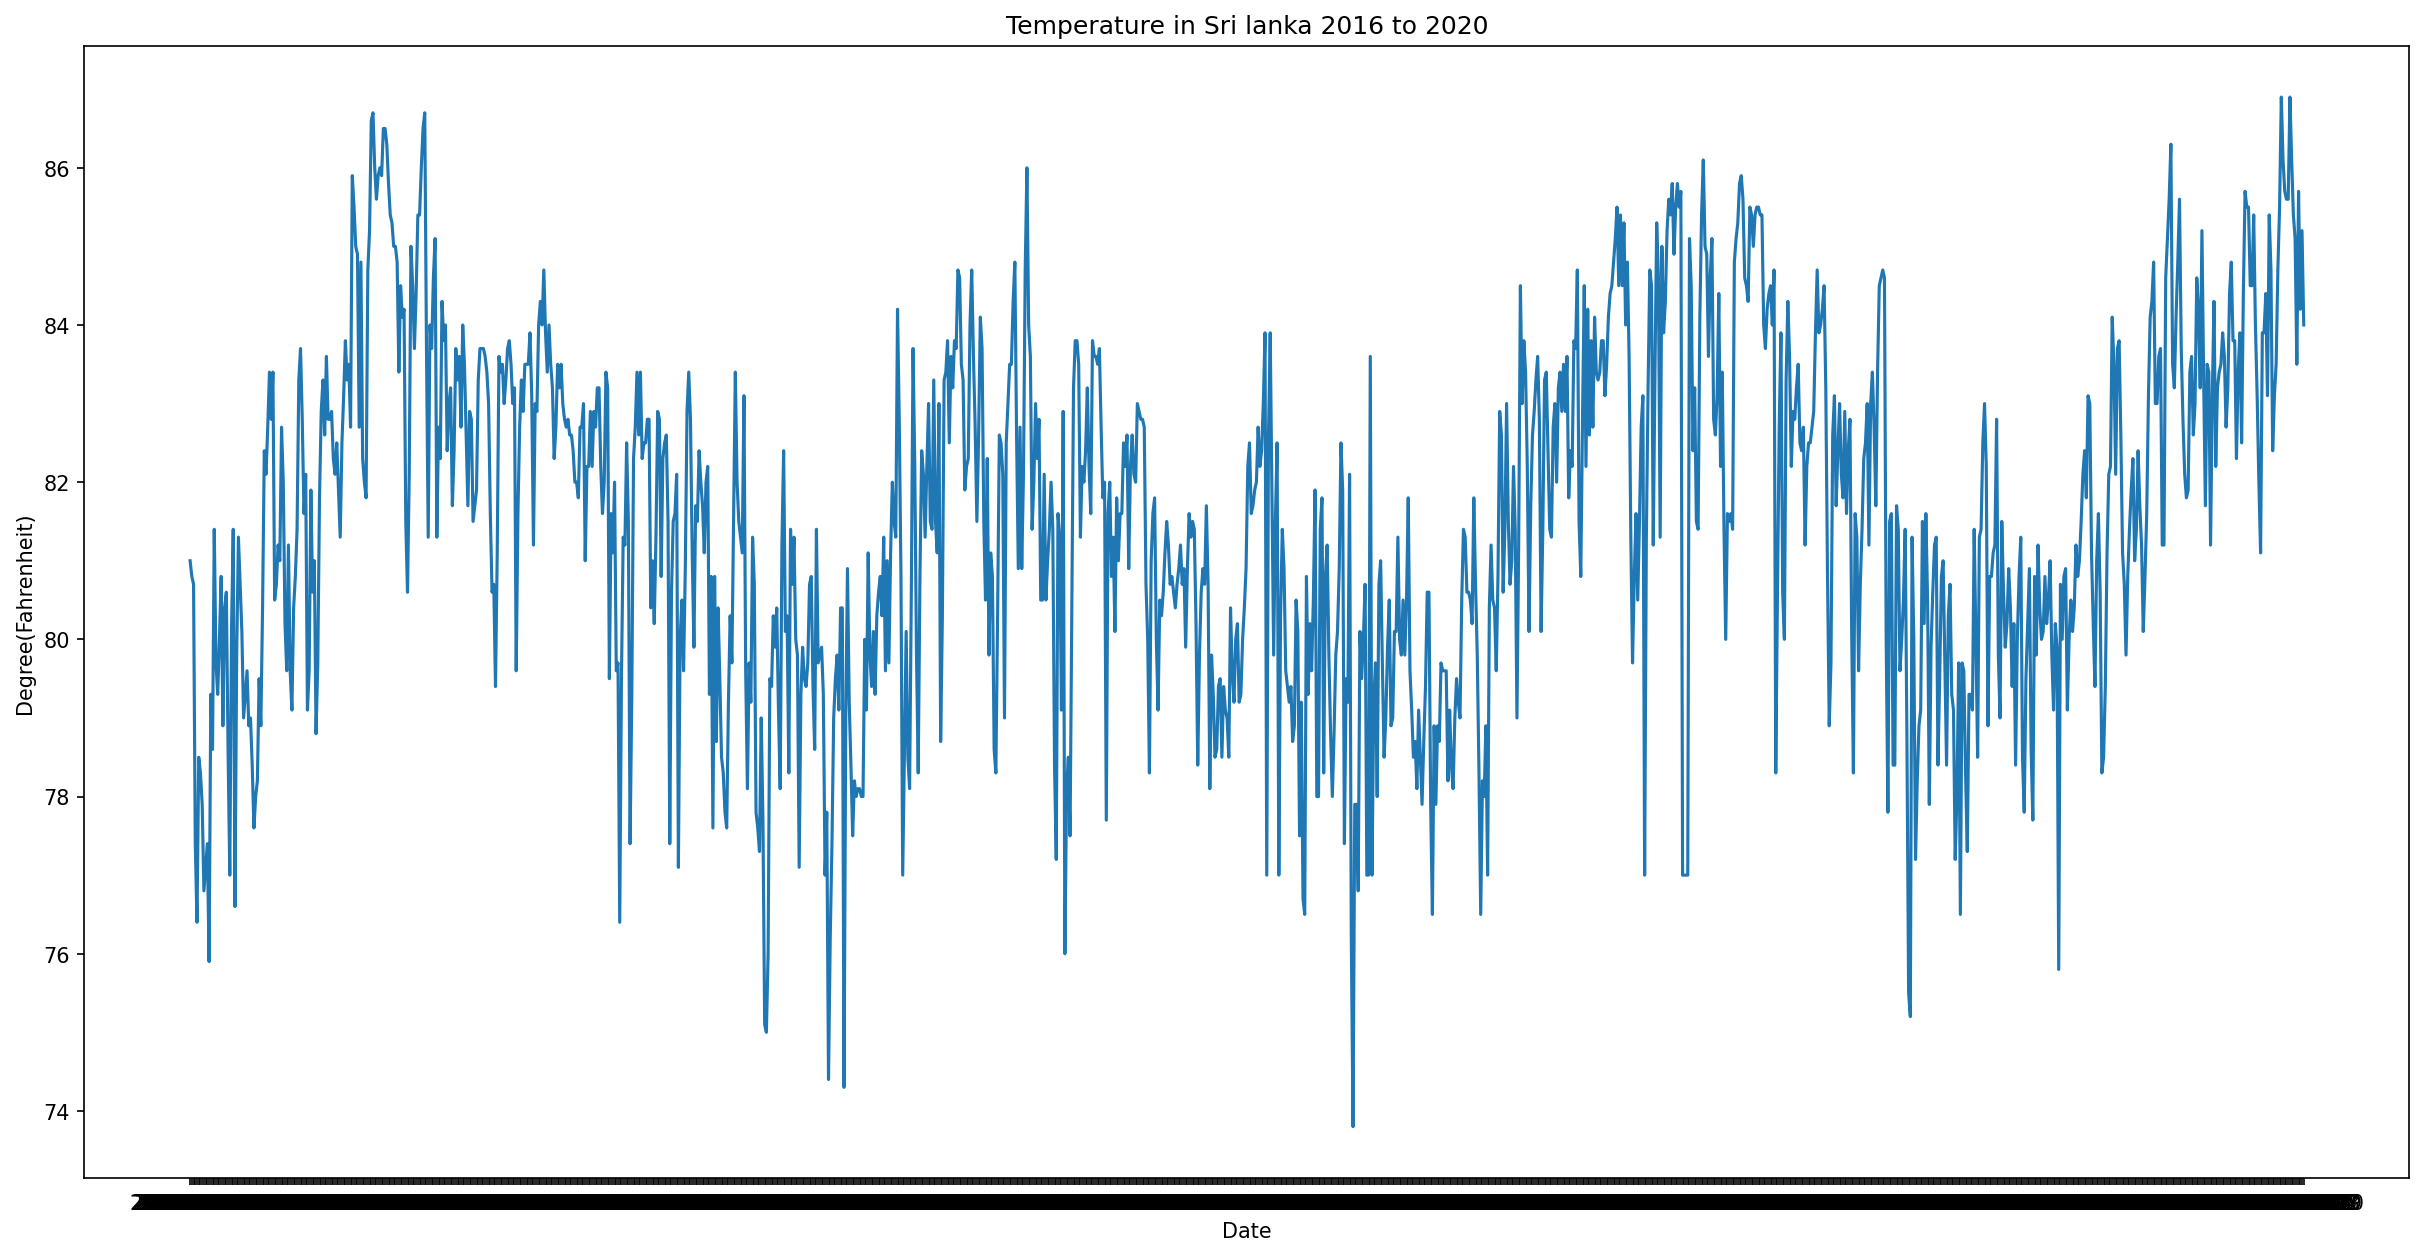

In [132]:
plt.figure(figsize=(20, 10), dpi=150)
plt.plot(dfpTempSl.index, dfpTempSl.AvgTemperature, color='tab:blue')
plt.gca().set(title='Temperature in Sri lanka 2016 to 2020', 
xlabel='Date', ylabel='Degree(Fahrenheit)')
plt.show()

<AxesSubplot:title={'center':'Temperature in Sri lanka 2016 to 2020'}, xlabel='Date'>

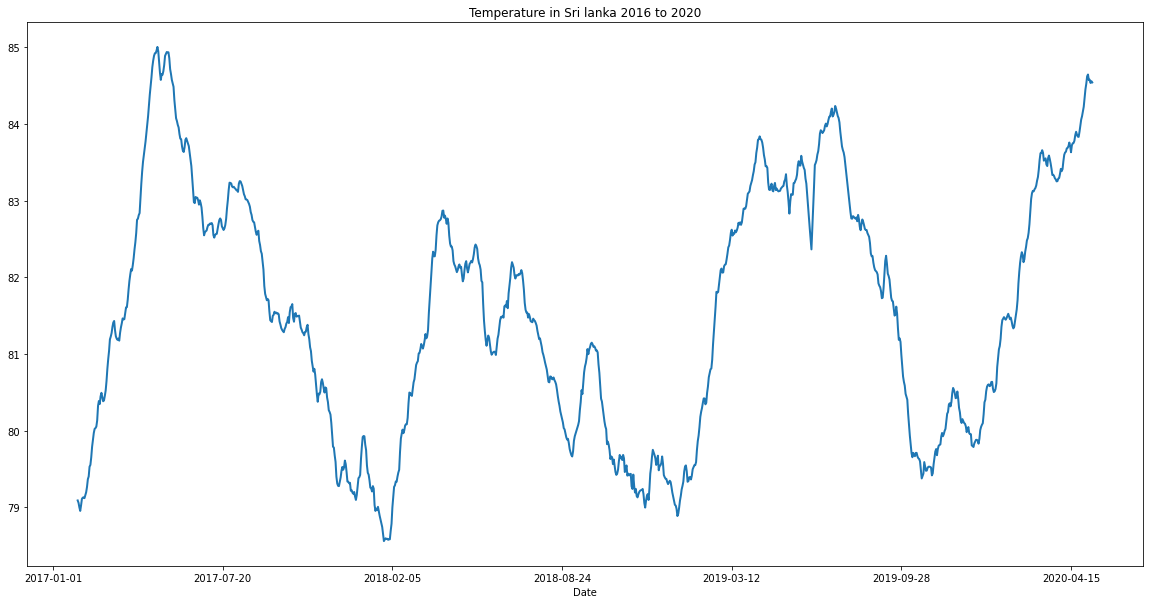

In [133]:
dfpTempSl_mean = dfpTempSl.AvgTemperature.rolling(window=30).mean()
dfpTempSl_mean.plot(figsize=(20, 10), linewidth=2, y='Degree(Fahrenheit)',
color='tab:blue', title='Temperature in Sri lanka 2016 to 2020')

/var/folders/tx/0z6_g9z54vgcmzlc659tdrbw0000gn/T/ipykernel_20318/4264152694.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_add = seasonal_decompose(dfpTempSl.AvgTemperature,


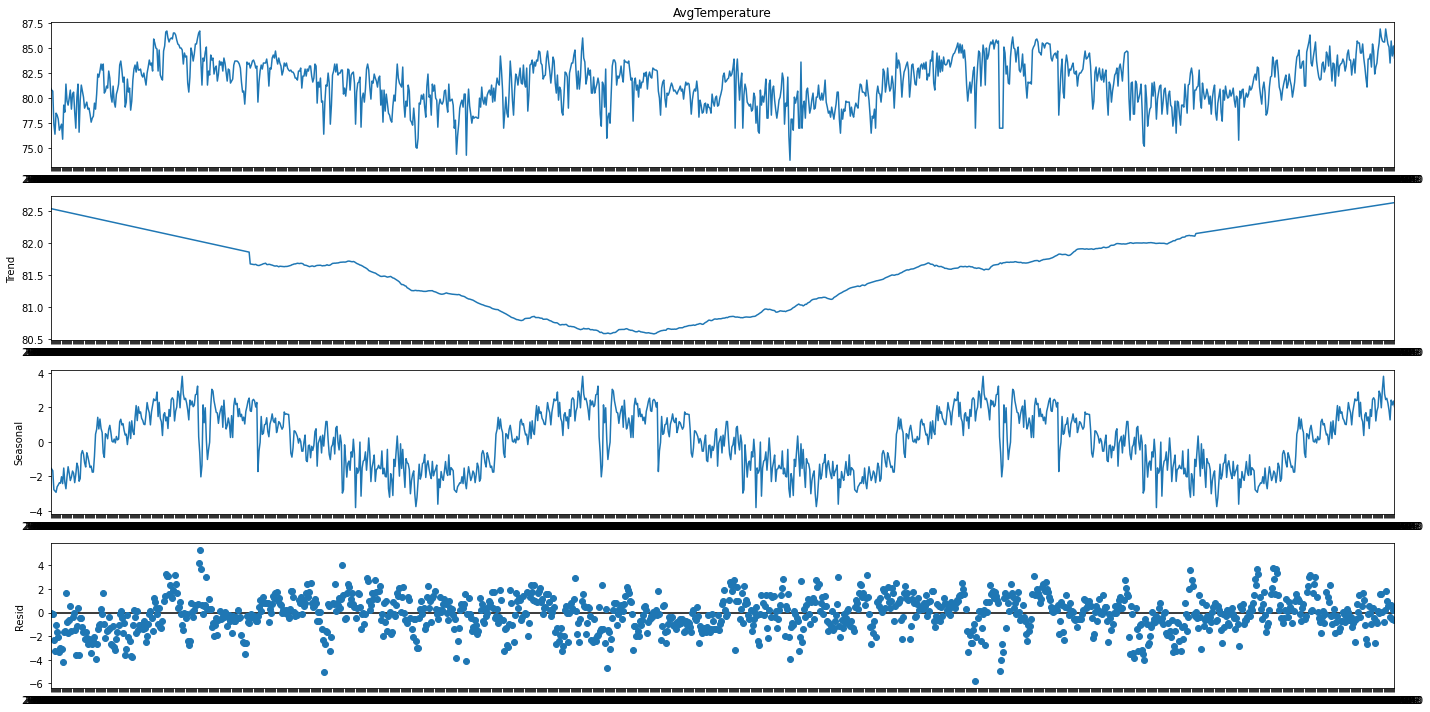

In [134]:

from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(dfpTempSl.AvgTemperature,
model='additive', extrapolate_trend='freq', freq=365)
plt.rcParams.update({'figure.figsize': (20, 10)})
result_add.plot().suptitle('', fontsize=15)
plt.show()